In [1]:
from sklearn import set_config
set_config(display='diagram')

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Gathering

In [4]:
df=pd.read_csv("Lending_TRAINING_DATA.csv")
df

,APPLICATION.ID,DSA.ID,DEALER.ID,APP.DATE,TIME.STAMP,APPLICATION.STATUS,QUEUE.ID,CURRENT.STAGE,MARITAL.STATUS,GENDER,...,CREDIT.CARD.NUMBER,CREDIT.CARDS.CATEGORY,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,PRIMARY.ASSET.MODELNO,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,27497000024,JB02005,27497,2017-02-28,22:11:01,Declined,Straight Through Process,PD_DE,Single,Male,...,NaN,NaN,REF-FF HOME,SAMSUNG,RT30K3723S8/HL,F,F,T,F,F
1,25556001005,RD02622,25556,2017-02-28,22:05:51,Approved,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,TELEVISION,SONY,KLV-29P423D,F,T,F,F,F
2,27220000249,SK02345,27220,2017-02-28,21:58:34,Approved,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,AIR CONDITIONER,ELECTROLUX,AIR CONDITIONER VANILLA,F,T,F,F,F
3,27067000029,DN30900,27067,2017-02-28,21:52:46,Declined,Under.Writer,DCLN,Married,Male,...,NaN,NaN,HOME THEATRE,TARGET,K1110 FM,F,F,T,F,F
4,26189000138,JB02005,26189,2017-02-28,21:52:33,Approved,Straight Through Process,APRV,Married,Male,...,NaN,NaN,SPLIT AC,ELECTROLUX,ES18T5C,F,F,F,T,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,25150001203,RP05168,25150,2017-02-22,10:43:08,Approved,Straight Through Process,APRV,Married,Male,...,NaN,NaN,PANEL - LED,SAMSUNG,UA32K5300ARLXL,F,F,F,T,F
7755,27199000069,RS24113,27199,2017-02-22,10:41:45,Declined,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,SAWM,LG,P8072R3F,F,F,T,T,F
7756,26805000032,SB44646,26805,2017-02-22,10:34:56,Declined,Under.Writer,DCLN,Single,Male,...,NaN,NaN,TELEVISION,SONY,KLV-32R302D,T,F,T,F,F
7757,28188000004,JD25733,28188,2017-02-22,10:24:20,Approved,Straight Through Process,LOS_DISB,Married,Male,...,NaN,NaN,AIR CONDITIONER,WHIRLPOOL,1.5T MAGICOOL PRM COPR 2S -WHITE-S,F,F,T,F,F


In [5]:
df.shape

(7759, 46)

In [6]:
df.shape[0]

7759

In [7]:
df.shape[1]

46

In [8]:
df.columns

Index(['APPLICATION.ID', 'DSA.ID', 'DEALER.ID', 'APP.DATE', 'TIME.STAMP',
       'APPLICATION.STATUS', 'QUEUE.ID', 'CURRENT.STAGE', 'MARITAL.STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE.TYPE', 'CITY', 'STATE',
       'ZIP.CODE', 'EMPLOY.CONSTITUTION', 'NET.TAKE.HOME.SALARY', 'PAN.STATUS',
       'CIBIL.SCORE', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPROVED.AMOUNT', 'ASSET.MAKE',
       'ASSET.CTG', 'APPLIED.AMOUNT', 'LOAN.TENOR', 'LOAN.TYPE',
       'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'OWN.HOUSE.TYPE',
       'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.YEAR.IN.BUSINESS',
       'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY',
       'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE', 'PRIMARY.ASSET.MODELNO',
       'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.ID                 7759 non-null   int64  
 1   DSA.ID                         7759 non-null   object 
 2   DEALER.ID                      7759 non-null   int64  
 3   APP.DATE                       7759 non-null   object 
 4   TIME.STAMP                     7759 non-null   object 
 5   APPLICATION.STATUS             7759 non-null   object 
 6   QUEUE.ID                       7759 non-null   object 
 7   CURRENT.STAGE                  7759 non-null   object 
 8   MARITAL.STATUS                 7759 non-null   object 
 9   GENDER                         7759 non-null   object 
 10  AGE                            7759 non-null   int64  
 11  EDUCATION                      7759 non-null   object 
 12  RESIDENCE.TYPE                 7759 non-null   o

# EDA

In [10]:
for i in df.columns:
    print(f"Attribute:{i.upper()}")
    print(df[i].value_counts())
    print("*"*70)

Attribute:APPLICATION.ID
27497000024    1
25749000111    1
26630000479    1
25561000842    1
25615000055    1
              ..
27947000025    1
26042000608    1
27676000086    1
25656000864    1
27059000043    1
Name: APPLICATION.ID, Length: 7759, dtype: int64
**********************************************************************
Attribute:DSA.ID
CK24399    54
SK02345    46
SB77779    44
GP93890    43
KP77551    43
           ..
SD19823     1
SP70370     1
SM26456     1
RS40372     1
BV56229     1
Name: DSA.ID, Length: 721, dtype: int64
**********************************************************************
Attribute:DEALER.ID
26563    78
25052    72
26560    60
25150    58
26557    55
         ..
27394     1
25764     1
25406     1
26902     1
27859     1
Name: DEALER.ID, Length: 1095, dtype: int64
**********************************************************************
Attribute:APP.DATE
2017-02-24    1247
2017-02-26    1198
2017-02-25    1148
2017-02-27    1111
2017-02-22    1094
2017-

Name: BANK_PASSBOOK, dtype: int64
**********************************************************************


In [11]:
df.head(2)

,APPLICATION.ID,DSA.ID,DEALER.ID,APP.DATE,TIME.STAMP,APPLICATION.STATUS,QUEUE.ID,CURRENT.STAGE,MARITAL.STATUS,GENDER,...,CREDIT.CARD.NUMBER,CREDIT.CARDS.CATEGORY,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,PRIMARY.ASSET.MODELNO,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,27497000024,JB02005,27497,2017-02-28,22:11:01,Declined,Straight Through Process,PD_DE,Single,Male,...,NaN,NaN,REF-FF HOME,SAMSUNG,RT30K3723S8/HL,F,F,T,F,F
1,25556001005,RD02622,25556,2017-02-28,22:05:51,Approved,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,TELEVISION,SONY,KLV-29P423D,F,T,F,F,F


In [12]:
df.drop(["APPLICATION.ID","DSA.ID","DEALER.ID",'APP.DATE', 'TIME.STAMP','QUEUE.ID',"CREDIT.CARD.NUMBER","CREDIT.CARDS.CATEGORY",
         "PRIMARY.ASSET.MODELNO",'CITY', 'STATE','ZIP.CODE','APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE','OFFICE.ADDRESS.SCORE', 
         'NAME.SCORE',"DEDUPE.REF.ID1"],axis=1,inplace=True)

In [13]:
df.describe()

,AGE,NET.TAKE.HOME.SALARY,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR,TRADER.YEAR.IN.BUSINESS
count,7759.000000,603.000000,3338.000000,7759.000000,7759.000000,98.000000
mean,35.693259,30102.011609,32321.973936,34211.627014,13.129656,24.795918
std,9.391776,52728.952855,15229.811288,18952.163116,12.682123,43.318756
min,12.000000,10100.000000,7001.000000,10.000000,0.000000,3.000000
25%,28.000000,15000.000000,20000.000000,21000.000000,10.000000,3.000000
50%,34.000000,20000.000000,30000.000000,30000.000000,12.000000,6.000000
75%,42.000000,29345.000000,40000.000000,43870.000000,12.000000,20.000000
max,67.000000,936000.000000,300000.000000,800000.000000,360.000000,240.000000


In [14]:
df.shape

(7759, 29)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.STATUS             7759 non-null   object 
 1   CURRENT.STAGE                  7759 non-null   object 
 2   MARITAL.STATUS                 7759 non-null   object 
 3   GENDER                         7759 non-null   object 
 4   AGE                            7759 non-null   int64  
 5   EDUCATION                      7759 non-null   object 
 6   RESIDENCE.TYPE                 7759 non-null   object 
 7   EMPLOY.CONSTITUTION            7759 non-null   object 
 8   NET.TAKE.HOME.SALARY           603 non-null    float64
 9   PAN.STATUS                     7758 non-null   object 
 10  CIBIL.SCORE                    7759 non-null   object 
 11  APPROVED.AMOUNT                3338 non-null   float64
 12  ASSET.MAKE                     3338 non-null   o

In [16]:
for i in df.columns:
    print(f"Attribute:{i.upper()}")
    print(df[i].value_counts())
    print("*"*70)

Attribute:APPLICATION.STATUS
Approved    4437
Declined    3322
Name: APPLICATION.STATUS, dtype: int64
**********************************************************************
Attribute:CURRENT.STAGE
PD_DE        2556
DCLN         2123
APRV         1107
INV_GNR       856
LOS_DISB      730
SRNV          295
LOS_BDE        86
LOS_ERROR       6
Name: CURRENT.STAGE, dtype: int64
**********************************************************************
Attribute:MARITAL.STATUS
Married    6257
Single     1502
Name: MARITAL.STATUS, dtype: int64
**********************************************************************
Attribute:GENDER
Male      6489
Female    1270
Name: GENDER, dtype: int64
**********************************************************************
Attribute:AGE
30    382
31    350
27    333
26    325
28    314
36    314
32    307
34    304
33    301
29    295
25    285
35    285
24    274
37    271
40    270
38    242
41    229
39    227
43    219
23    209
42    183
22    174
46    164
45

In [17]:
df.columns

Index(['APPLICATION.STATUS', 'CURRENT.STAGE', 'MARITAL.STATUS', 'GENDER',
       'AGE', 'EDUCATION', 'RESIDENCE.TYPE', 'EMPLOY.CONSTITUTION',
       'NET.TAKE.HOME.SALARY', 'PAN.STATUS', 'CIBIL.SCORE', 'APPROVED.AMOUNT',
       'ASSET.MAKE', 'ASSET.CTG', 'APPLIED.AMOUNT', 'LOAN.TENOR', 'LOAN.TYPE',
       'CAR.CATEGORY', 'OWN.HOUSE.TYPE', 'HOUSE.SURROGATE.DOCUMENT.TYPE',
       'TRADER.YEAR.IN.BUSINESS', 'TRADER.BUSINESS.PROOF', 'PRIMARY.ASSET.CTG',
       'PRIMARY.ASSET.MAKE', 'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN',
       'BANK_PASSBOOK'],
      dtype='object')

In [18]:
df['APPLICATION.STATUS']=df['APPLICATION.STATUS'].replace({"Approved":1,"Declined":0})
df['MARITAL.STATUS']=df['MARITAL.STATUS'].replace({"Married":1,"Single":0})
df['GENDER']=df['GENDER'].replace({"Male":1,"Female":0})
df['VOTER_ID']=df['VOTER_ID'].replace({"T":1,"F":0})
df['DRIVING_LICENSE']=df['DRIVING_LICENSE'].replace({"T":1,"F":0})
df['AADHAAR']=df['AADHAAR'].replace({"T":1,"F":0})
df['BANK_PASSBOOK']=df['BANK_PASSBOOK'].replace({"T":1,"F":0})

In [19]:
labenc=LabelEncoder()
df["CURRENT.STAGE"]=labenc.fit_transform(df["CURRENT.STAGE"])
df_aducation=pd.get_dummies(df["EDUCATION"],drop_first=True)
df["RESIDENCE.TYPE"]=labenc.fit_transform(df["RESIDENCE.TYPE"])
df["EMPLOY.CONSTITUTION"]=labenc.fit_transform(df["EMPLOY.CONSTITUTION"])
df["NET.TAKE.HOME.SALARY"]=labenc.fit_transform(df["NET.TAKE.HOME.SALARY"])
df["ASSET.MAKE"]=labenc.fit_transform(df["ASSET.MAKE"])
df_pan_status=pd.get_dummies(df["PAN.STATUS"],drop_first=True)
df["CIBIL.SCORE"]=labenc.fit_transform(df["CIBIL.SCORE"])
df["ASSET.CTG"]=labenc.fit_transform(df["ASSET.CTG"])
df["CAR.CATEGORY"]=labenc.fit_transform(df["CAR.CATEGORY"])
df["OWN.HOUSE.TYPE"]=labenc.fit_transform(df["OWN.HOUSE.TYPE"])
df["HOUSE.SURROGATE.DOCUMENT.TYPE"]=labenc.fit_transform(df["HOUSE.SURROGATE.DOCUMENT.TYPE"])
df["TRADER.BUSINESS.PROOF"]=labenc.fit_transform(df["TRADER.BUSINESS.PROOF"])
df["PRIMARY.ASSET.CTG"]=labenc.fit_transform(df["PRIMARY.ASSET.CTG"])
df["PRIMARY.ASSET.MAKE"]=labenc.fit_transform(df["PRIMARY.ASSET.MAKE"])

In [20]:
df.drop("LOAN.TYPE",axis=1,inplace=True)

In [21]:
df

,APPLICATION.STATUS,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,NET.TAKE.HOME.SALARY,PAN.STATUS,...,HOUSE.SURROGATE.DOCUMENT.TYPE,TRADER.YEAR.IN.BUSINESS,TRADER.BUSINESS.PROOF,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,0,6,0,1,30,GRADUATE,2,3,156,Pan Not Submitted,...,4,NaN,3,39,38,0,0,1,F,0
1,1,6,1,1,38,OTHERS,8,3,156,Pan Not Submitted,...,3,NaN,3,45,42,0,1,0,F,0
2,1,6,1,1,52,GRADUATE,6,3,156,Pan Not Submitted,...,3,NaN,3,0,10,0,1,0,F,0
3,0,1,1,1,57,GRADUATE,2,3,156,Pan Not Submitted,...,3,NaN,3,13,46,0,0,1,F,0
4,1,0,1,1,38,GRADUATE,2,2,156,ERROR,...,3,NaN,3,44,10,0,0,0,T,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,1,0,1,1,39,OTHERS,3,2,156,EXIST,...,3,NaN,3,24,38,0,0,0,T,0
7755,0,6,1,1,31,GRADUATE,8,3,156,EXIST,...,3,NaN,3,43,25,0,0,1,T,0
7756,0,1,0,1,21,GRADUATE,3,3,156,Pan Not Submitted,...,3,NaN,3,45,42,1,0,1,F,0
7757,1,4,1,1,31,OTHERS,8,2,156,Pan Not Submitted,...,4,NaN,3,0,55,0,0,1,F,0


In [22]:
df_aducation

,GRADUATE,OTHERS,POST-GRADUATE,PROFESSIONAL,UNDER GRADUATE
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7754,0,1,0,0,0
7755,1,0,0,0,0
7756,1,0,0,0,0
7757,0,1,0,0,0


In [23]:
df_pan_status

,EXIST,NOT_FOUND,Pan Not Submitted
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
7754,1,0,0
7755,1,0,0
7756,0,0,1
7757,0,0,1


In [24]:
df1=pd.concat([df,df_aducation,df_pan_status],axis=1)

In [25]:
df1

,APPLICATION.STATUS,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,NET.TAKE.HOME.SALARY,PAN.STATUS,...,PAN,BANK_PASSBOOK,GRADUATE,OTHERS,POST-GRADUATE,PROFESSIONAL,UNDER GRADUATE,EXIST,NOT_FOUND,Pan Not Submitted
0,0,6,0,1,30,GRADUATE,2,3,156,Pan Not Submitted,...,F,0,1,0,0,0,0,0,0,1
1,1,6,1,1,38,OTHERS,8,3,156,Pan Not Submitted,...,F,0,0,1,0,0,0,0,0,1
2,1,6,1,1,52,GRADUATE,6,3,156,Pan Not Submitted,...,F,0,1,0,0,0,0,0,0,1
3,0,1,1,1,57,GRADUATE,2,3,156,Pan Not Submitted,...,F,0,1,0,0,0,0,0,0,1
4,1,0,1,1,38,GRADUATE,2,2,156,ERROR,...,T,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,1,0,1,1,39,OTHERS,3,2,156,EXIST,...,T,0,0,1,0,0,0,1,0,0
7755,0,6,1,1,31,GRADUATE,8,3,156,EXIST,...,T,0,1,0,0,0,0,1,0,0
7756,0,1,0,1,21,GRADUATE,3,3,156,Pan Not Submitted,...,F,0,1,0,0,0,0,0,0,1
7757,1,4,1,1,31,OTHERS,8,2,156,Pan Not Submitted,...,F,0,0,1,0,0,0,0,0,1


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.STATUS             7759 non-null   int64  
 1   CURRENT.STAGE                  7759 non-null   int32  
 2   MARITAL.STATUS                 7759 non-null   int64  
 3   GENDER                         7759 non-null   int64  
 4   AGE                            7759 non-null   int64  
 5   EDUCATION                      7759 non-null   object 
 6   RESIDENCE.TYPE                 7759 non-null   int32  
 7   EMPLOY.CONSTITUTION            7759 non-null   int32  
 8   NET.TAKE.HOME.SALARY           7759 non-null   int64  
 9   PAN.STATUS                     7758 non-null   object 
 10  CIBIL.SCORE                    7759 non-null   int32  
 11  APPROVED.AMOUNT                3338 non-null   float64
 12  ASSET.MAKE                     7759 non-null   i

In [27]:
df1.drop(["EDUCATION","PAN.STATUS"],axis=1,inplace=True)

In [28]:
df1

,APPLICATION.STATUS,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,NET.TAKE.HOME.SALARY,CIBIL.SCORE,APPROVED.AMOUNT,...,PAN,BANK_PASSBOOK,GRADUATE,OTHERS,POST-GRADUATE,PROFESSIONAL,UNDER GRADUATE,EXIST,NOT_FOUND,Pan Not Submitted
0,0,6,0,1,30,2,3,156,256,NaN,...,F,0,1,0,0,0,0,0,0,1
1,1,6,1,1,38,8,3,156,362,47000.0,...,F,0,0,1,0,0,0,0,0,1
2,1,6,1,1,52,6,3,156,383,30000.0,...,F,0,1,0,0,0,0,0,0,1
3,0,1,1,1,57,2,3,156,2,NaN,...,F,0,1,0,0,0,0,0,0,1
4,1,0,1,1,38,2,2,156,319,NaN,...,T,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,1,0,1,1,39,3,2,156,2,NaN,...,T,0,0,1,0,0,0,1,0,0
7755,0,6,1,1,31,8,3,156,141,NaN,...,T,0,1,0,0,0,0,1,0,0
7756,0,1,0,1,21,3,3,156,2,NaN,...,F,0,1,0,0,0,0,0,0,1
7757,1,4,1,1,31,8,2,156,300,30000.0,...,F,0,0,1,0,0,0,0,0,1


In [29]:
df1.isna().sum()

APPLICATION.STATUS                  0
CURRENT.STAGE                       0
MARITAL.STATUS                      0
GENDER                              0
AGE                                 0
RESIDENCE.TYPE                      0
EMPLOY.CONSTITUTION                 0
NET.TAKE.HOME.SALARY                0
CIBIL.SCORE                         0
APPROVED.AMOUNT                  4421
ASSET.MAKE                          0
ASSET.CTG                           0
APPLIED.AMOUNT                      0
LOAN.TENOR                          0
CAR.CATEGORY                        0
OWN.HOUSE.TYPE                      0
HOUSE.SURROGATE.DOCUMENT.TYPE       0
TRADER.YEAR.IN.BUSINESS          7661
TRADER.BUSINESS.PROOF               0
PRIMARY.ASSET.CTG                   0
PRIMARY.ASSET.MAKE                  0
VOTER_ID                            0
DRIVING_LICENSE                     0
AADHAAR                             0
PAN                                 0
BANK_PASSBOOK                       0
GRADUATE    

In [30]:
df1.drop("TRADER.YEAR.IN.BUSINESS",axis=1,inplace=True)

In [31]:
df1["APPROVED.AMOUNT"].value_counts()

30000.0     399
50000.0     354
20000.0     274
40000.0     230
25000.0     227
           ... 
17650.0       1
59900.0       1
300000.0      1
27900.0       1
19990.0       1
Name: APPROVED.AMOUNT, Length: 303, dtype: int64

# Feature Engineering

In [32]:
df1["APPROVED.AMOUNT"]=df1["APPROVED.AMOUNT"].fillna(df1["APPROVED.AMOUNT"].median())

In [33]:
df1.isna().sum()

APPLICATION.STATUS               0
CURRENT.STAGE                    0
MARITAL.STATUS                   0
GENDER                           0
AGE                              0
RESIDENCE.TYPE                   0
EMPLOY.CONSTITUTION              0
NET.TAKE.HOME.SALARY             0
CIBIL.SCORE                      0
APPROVED.AMOUNT                  0
ASSET.MAKE                       0
ASSET.CTG                        0
APPLIED.AMOUNT                   0
LOAN.TENOR                       0
CAR.CATEGORY                     0
OWN.HOUSE.TYPE                   0
HOUSE.SURROGATE.DOCUMENT.TYPE    0
TRADER.BUSINESS.PROOF            0
PRIMARY.ASSET.CTG                0
PRIMARY.ASSET.MAKE               0
VOTER_ID                         0
DRIVING_LICENSE                  0
AADHAAR                          0
PAN                              0
BANK_PASSBOOK                    0
GRADUATE                         0
OTHERS                           0
POST-GRADUATE                    0
PROFESSIONAL        

# Feature Selection

## Coeficient of Corelation

In [34]:
df1.corr()

,APPLICATION.STATUS,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,NET.TAKE.HOME.SALARY,CIBIL.SCORE,APPROVED.AMOUNT,...,AADHAAR,BANK_PASSBOOK,GRADUATE,OTHERS,POST-GRADUATE,PROFESSIONAL,UNDER GRADUATE,EXIST,NOT_FOUND,Pan Not Submitted
APPLICATION.STATUS,1.000000,0.121091,0.033570,-0.007566,0.006241,-0.136641,-0.015790,0.010031,0.270978,0.086025,...,-0.020269,-0.028644,0.036967,-0.046160,0.017740,-0.001216,-0.013665,-0.009600,-0.048275,0.030079
CURRENT.STAGE,0.121091,1.000000,0.021057,0.013080,0.011578,-0.025147,-0.004456,0.010361,0.102575,0.080823,...,0.005922,0.002423,0.008335,-0.050413,0.023705,0.009082,0.020471,0.039228,-0.029621,-0.046354
MARITAL.STATUS,0.033570,0.021057,1.000000,-0.119771,0.387161,-0.035778,0.102367,0.050150,0.036100,0.017446,...,-0.000972,0.005093,-0.076644,0.060368,-0.027261,-0.014279,0.053793,-0.013373,-0.011730,0.018993
GENDER,-0.007566,0.013080,-0.119771,1.000000,-0.034777,-0.014996,-0.040424,0.017497,0.097249,-0.023627,...,-0.057929,-0.035673,0.001953,-0.003975,0.005521,0.017599,-0.004455,0.045820,0.005321,-0.065294
AGE,0.006241,0.011578,0.387161,-0.034777,1.000000,-0.144581,0.103378,0.046566,0.072107,0.059460,...,0.033083,0.001799,-0.051053,0.052258,-0.028688,-0.008605,0.030486,-0.040703,-0.005419,0.069808
RESIDENCE.TYPE,-0.136641,-0.025147,-0.035778,-0.014996,-0.144581,1.000000,-0.065950,-0.126420,-0.046128,-0.023944,...,0.019478,0.065234,-0.015114,0.014247,0.022070,-0.001298,-0.003698,0.036630,0.016708,-0.067153
EMPLOY.CONSTITUTION,-0.015790,-0.004456,0.102367,-0.040424,0.103378,-0.065950,1.000000,0.263046,-0.023181,0.023058,...,0.033662,0.014620,-0.075285,0.074178,-0.102746,0.005495,0.079575,0.005509,0.008192,0.030903
NET.TAKE.HOME.SALARY,0.010031,0.010361,0.050150,0.017497,0.046566,-0.126420,0.263046,1.000000,0.020678,0.038026,...,-0.002252,-0.010996,-0.096945,0.056721,-0.009269,-0.007811,0.070285,0.020690,-0.003130,-0.008477
CIBIL.SCORE,0.270978,0.102575,0.036100,0.097249,0.072107,-0.046128,-0.023181,0.020678,1.000000,0.157502,...,-0.080092,-0.016670,0.062050,-0.034961,0.051488,0.009601,-0.074747,0.058009,-0.015357,-0.090127
APPROVED.AMOUNT,0.086025,0.080823,0.017446,-0.023627,0.059460,-0.023944,0.023058,0.038026,0.157502,1.000000,...,0.005784,-0.016803,0.039600,-0.001613,0.069529,0.001457,-0.082930,0.020726,-0.003528,-0.040849


<AxesSubplot:>

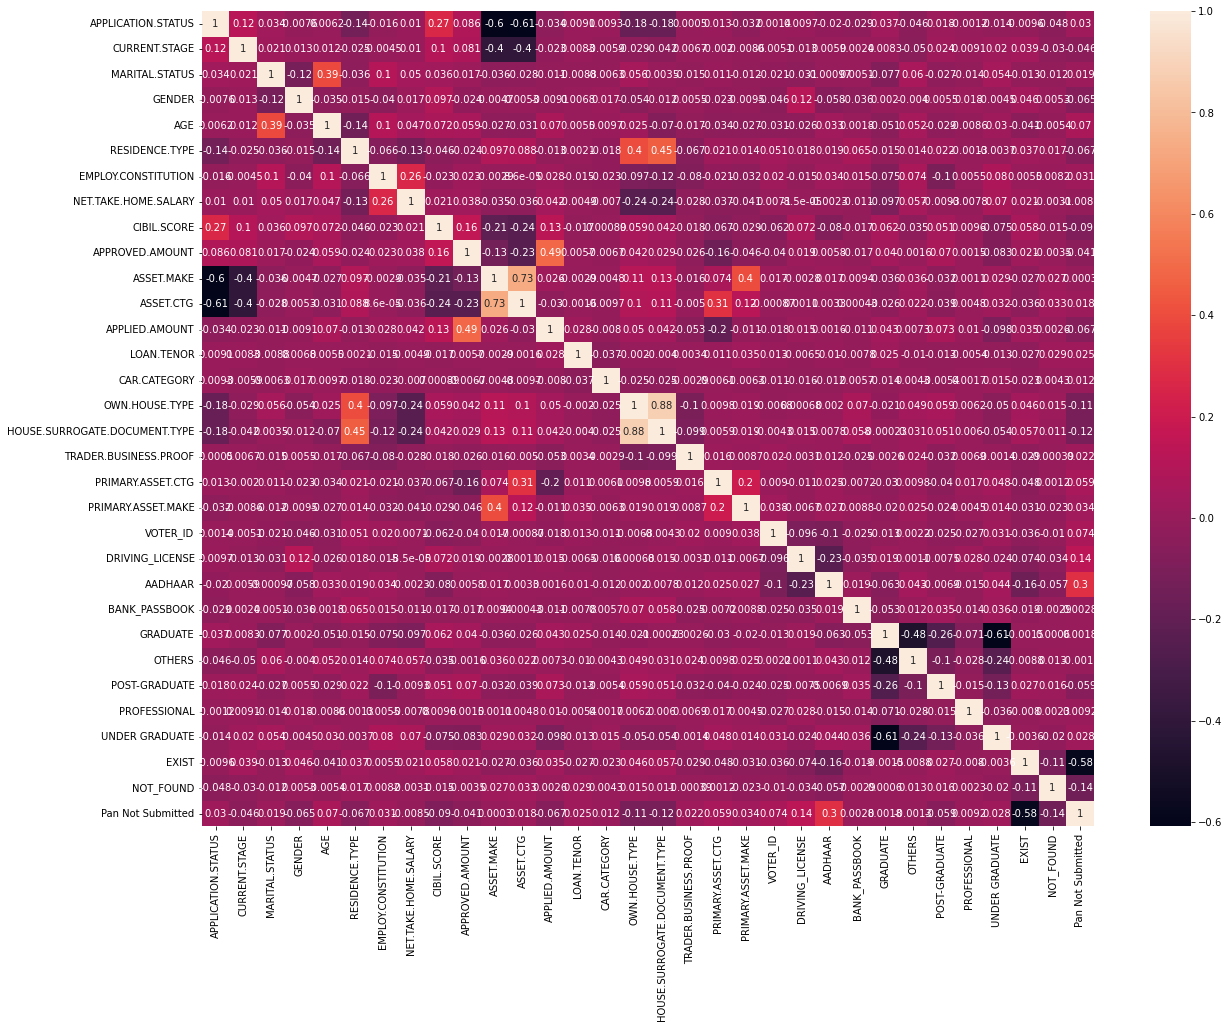

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

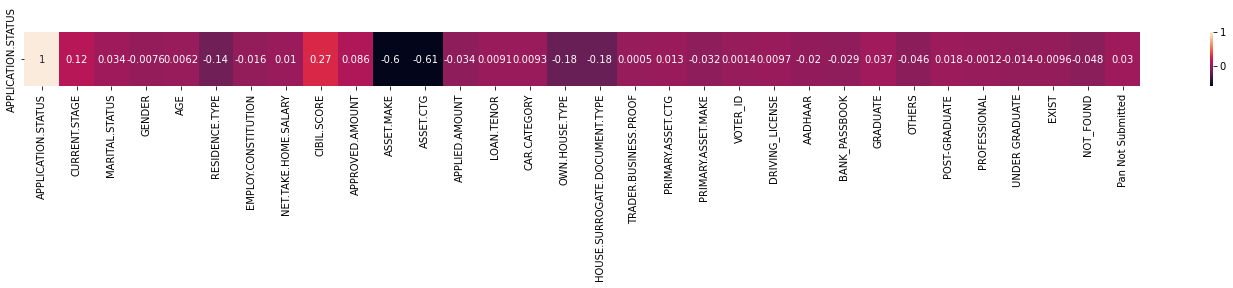

In [36]:
plt.figure(figsize=(25,1))
sns.heatmap(df1.corr().head(1),annot=True)

In [37]:
df1['PAN']=df1['PAN'].replace({"T":1,"F":0})

## chi-square Test

In [38]:
from sklearn.feature_selection import chi2

In [39]:
x=df1.drop("APPLICATION.STATUS",axis=1)
y=df1["APPLICATION.STATUS"]

In [40]:
chi_square,p_value=chi2(x,y)
p_val=np.around(p_value,3)
chi2_df=pd.DataFrame({"Columns":x.columns,"P_value":p_value,"Chi_square":chi_square})
chi2_df.sort_values("Chi_square",ascending=False,ignore_index=True)


,Columns,P_value,Chi_square
0,APPROVED.AMOUNT,0.000000e+00,187226.935120
1,APPLIED.AMOUNT,0.000000e+00,94398.140758
2,CIBIL.SCORE,0.000000e+00,77689.348560
3,ASSET.CTG,0.000000e+00,16610.335194
4,ASSET.MAKE,0.000000e+00,11960.279650
5,RESIDENCE.TYPE,1.503072e-67,301.564237
6,CURRENT.STAGE,4.028229e-50,221.610427
7,OWN.HOUSE.TYPE,4.493935e-33,143.533309
8,PRIMARY.ASSET.MAKE,9.739636e-11,41.873039
9,HOUSE.SURROGATE.DOCUMENT.TYPE,2.372627e-06,22.266889


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.STATUS             7759 non-null   int64  
 1   CURRENT.STAGE                  7759 non-null   int32  
 2   MARITAL.STATUS                 7759 non-null   int64  
 3   GENDER                         7759 non-null   int64  
 4   AGE                            7759 non-null   int64  
 5   RESIDENCE.TYPE                 7759 non-null   int32  
 6   EMPLOY.CONSTITUTION            7759 non-null   int32  
 7   NET.TAKE.HOME.SALARY           7759 non-null   int64  
 8   CIBIL.SCORE                    7759 non-null   int32  
 9   APPROVED.AMOUNT                7759 non-null   float64
 10  ASSET.MAKE                     7759 non-null   int32  
 11  ASSET.CTG                      7759 non-null   int32  
 12  APPLIED.AMOUNT                 7759 non-null   i

## Information Gain

In [42]:
from sklearn.feature_selection import mutual_info_classif

<AxesSubplot:>

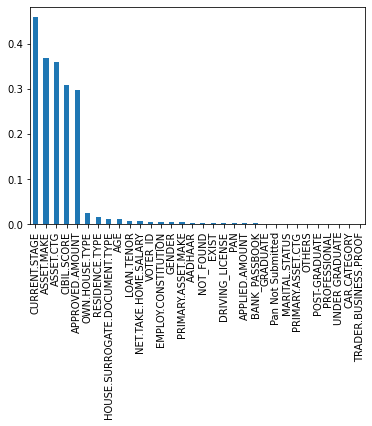

In [43]:
info_gain=mutual_info_classif(x,y)
A=pd.Series(info_gain)
A.index=x.columns
A.sort_values(ascending=False).plot(kind="bar")

In [44]:
!pip install skfeature-chappers

In [45]:
from skfeature.function.similarity_based import fisher_score

<AxesSubplot:>

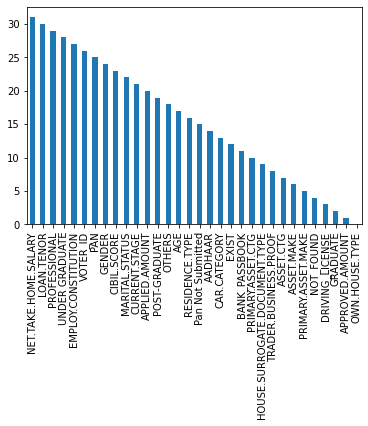

In [46]:
fisher_score=fisher_score.fisher_score(x.values,y)
A=pd.Series(fisher_score)
A.index=x.columns
A.sort_values(ascending=False).plot(kind="bar")

In [47]:
df1.drop(["DRIVING_LICENSE","EXIST","EMPLOY.CONSTITUTION","GENDER","VOTER_ID","PROFESSIONAL","CAR.CATEGORY","TRADER.BUSINESS.PROOF"],axis=1,inplace=True)

In [48]:
df

,APPLICATION.STATUS,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,NET.TAKE.HOME.SALARY,PAN.STATUS,...,HOUSE.SURROGATE.DOCUMENT.TYPE,TRADER.YEAR.IN.BUSINESS,TRADER.BUSINESS.PROOF,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,0,6,0,1,30,GRADUATE,2,3,156,Pan Not Submitted,...,4,NaN,3,39,38,0,0,1,F,0
1,1,6,1,1,38,OTHERS,8,3,156,Pan Not Submitted,...,3,NaN,3,45,42,0,1,0,F,0
2,1,6,1,1,52,GRADUATE,6,3,156,Pan Not Submitted,...,3,NaN,3,0,10,0,1,0,F,0
3,0,1,1,1,57,GRADUATE,2,3,156,Pan Not Submitted,...,3,NaN,3,13,46,0,0,1,F,0
4,1,0,1,1,38,GRADUATE,2,2,156,ERROR,...,3,NaN,3,44,10,0,0,0,T,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,1,0,1,1,39,OTHERS,3,2,156,EXIST,...,3,NaN,3,24,38,0,0,0,T,0
7755,0,6,1,1,31,GRADUATE,8,3,156,EXIST,...,3,NaN,3,43,25,0,0,1,T,0
7756,0,1,0,1,21,GRADUATE,3,3,156,Pan Not Submitted,...,3,NaN,3,45,42,1,0,1,F,0
7757,1,4,1,1,31,OTHERS,8,2,156,Pan Not Submitted,...,4,NaN,3,0,55,0,0,1,F,0


# Spliting

In [49]:
x=df1.drop("APPLICATION.STATUS",axis=1)
y=df1["APPLICATION.STATUS"]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# Model Training

In [51]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

## Training Data Accuracy

In [52]:
y_train_pred=log_model.predict(x_train)

training_accuracy=accuracy_score(y_train,y_train_pred)
print(f"Training Accuracy:\n{training_accuracy}")
print()
class_report=classification_report(y_train,y_train_pred)
print(f"Classification Report: \n{class_report}")
print()
conf_matrix=confusion_matrix(y_train,y_train_pred)
print(f"Confussion Matrix: \n{conf_matrix}")

Training Accuracy:
0.8218140808764298

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2658
           1       0.90      0.77      0.83      3549

    accuracy                           0.82      6207
   macro avg       0.82      0.83      0.82      6207
weighted avg       0.83      0.82      0.82      6207


Confussion Matrix: 
[[2355  303]
 [ 803 2746]]


## Testing Data Accuracy

In [53]:
y_test_pred=log_model.predict(x_test)

training_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Training Accuracy:\n{training_accuracy}")
print()
class_report=classification_report(y_test,y_test_pred)
print(f"Classification Report: \n{class_report}")
print()
conf_matrix=confusion_matrix(y_test,y_test_pred)
print(f"Confussion Matrix: \n{conf_matrix}")

Training Accuracy:
0.8221649484536082

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       664
           1       0.90      0.77      0.83       888

    accuracy                           0.82      1552
   macro avg       0.82      0.83      0.82      1552
weighted avg       0.84      0.82      0.82      1552


Confussion Matrix: 
[[591  73]
 [203 685]]


In [54]:
residuals= y_train - y_train_pred
print(residuals)

2774    0
6206    0
715     0
3288    1
5650    0
       ..
3994    0
4585   -1
6678    0
7341    0
654     0
Name: APPLICATION.STATUS, Length: 6207, dtype: int64


<AxesSubplot:xlabel='APPLICATION.STATUS', ylabel='Density'>

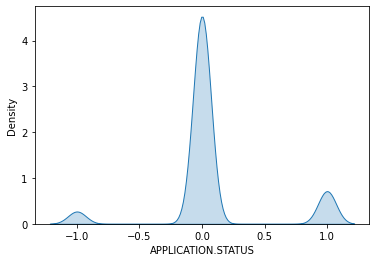

In [55]:
sns.kdeplot(residuals,fill=True)

<AxesSubplot:xlabel='APPLICATION.STATUS', ylabel='Count'>

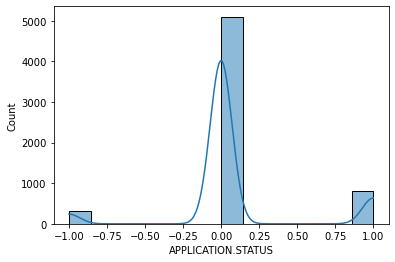

In [56]:
sns.histplot(residuals,kde=True)

In [57]:
df1

,APPLICATION.STATUS,CURRENT.STAGE,MARITAL.STATUS,AGE,RESIDENCE.TYPE,NET.TAKE.HOME.SALARY,CIBIL.SCORE,APPROVED.AMOUNT,ASSET.MAKE,ASSET.CTG,...,PRIMARY.ASSET.MAKE,AADHAAR,PAN,BANK_PASSBOOK,GRADUATE,OTHERS,POST-GRADUATE,UNDER GRADUATE,NOT_FOUND,Pan Not Submitted
0,0,6,0,30,2,156,256,30000.0,51,46,...,38,1,0,0,1,0,0,0,0,1
1,1,6,1,38,8,156,362,47000.0,40,36,...,42,0,0,0,0,1,0,0,0,1
2,1,6,1,52,6,156,383,30000.0,9,35,...,10,0,0,0,1,0,0,0,0,1
3,0,1,1,57,2,156,2,30000.0,51,46,...,46,1,0,0,1,0,0,0,0,1
4,1,0,1,38,2,156,319,30000.0,51,46,...,10,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,1,0,1,39,3,156,2,30000.0,51,46,...,38,0,1,0,0,1,0,0,0,0
7755,0,6,1,31,8,156,141,30000.0,51,46,...,25,1,1,0,1,0,0,0,0,0
7756,0,1,0,21,3,156,2,30000.0,51,46,...,42,1,0,0,1,0,0,0,0,1
7757,1,4,1,31,8,156,300,30000.0,50,0,...,55,1,0,0,0,1,0,0,0,1


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.STATUS             7759 non-null   int64  
 1   CURRENT.STAGE                  7759 non-null   int32  
 2   MARITAL.STATUS                 7759 non-null   int64  
 3   AGE                            7759 non-null   int64  
 4   RESIDENCE.TYPE                 7759 non-null   int32  
 5   NET.TAKE.HOME.SALARY           7759 non-null   int64  
 6   CIBIL.SCORE                    7759 non-null   int32  
 7   APPROVED.AMOUNT                7759 non-null   float64
 8   ASSET.MAKE                     7759 non-null   int32  
 9   ASSET.CTG                      7759 non-null   int32  
 10  APPLIED.AMOUNT                 7759 non-null   int64  
 11  LOAN.TENOR                     7759 non-null   int64  
 12  OWN.HOUSE.TYPE                 7759 non-null   i

<AxesSubplot:xlabel='CURRENT.STAGE'>

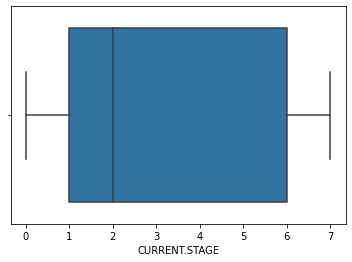

In [59]:
sns.boxplot(df["CURRENT.STAGE"])

<AxesSubplot:>

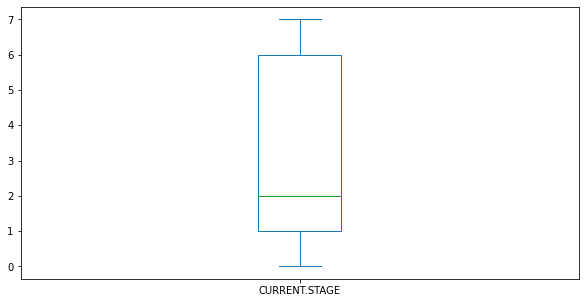

In [60]:
df1["CURRENT.STAGE"].plot.box(figsize=(10,5))

<AxesSubplot:xlabel='NET.TAKE.HOME.SALARY'>

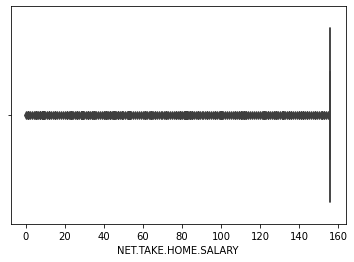

In [61]:
sns.boxplot(df1["NET.TAKE.HOME.SALARY"])

## Z-Score Method

In [62]:
mean=df1["NET.TAKE.HOME.SALARY"].mean()
std=df1["NET.TAKE.HOME.SALARY"].std()

threshold=3
outliers=[]

for x in df1["NET.TAKE.HOME.SALARY"]:
    z_score=(x-mean)/std
    #print(x,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x)
print(f"Detected Outliers are: {outliers}")
print()
print(f"Total Number of outliers :{len(outliers)}")

Detected Outliers are: [9, 9, 12, 25, 41, 29, 29, 29, 34, 23, 29, 67, 23, 9, 29, 4, 24, 30, 29, 61, 40, 29, 9, 60, 34, 29, 53, 23, 64, 43, 53, 9, 9, 9, 64, 23, 23, 29, 1, 45, 19, 45, 56, 9, 53, 32, 29, 11, 29, 29, 23, 53, 1, 29, 55, 9, 23, 12, 9, 23, 45, 29, 41, 53, 53, 29, 26, 53, 1, 29, 53, 38, 6, 29, 21, 35, 32, 9, 29, 2, 9, 45, 29, 5, 29, 9, 64, 5, 9, 53, 9, 9, 9, 35, 45, 9, 23, 64, 29, 35, 61, 9, 29, 5, 41, 61, 26, 9, 7, 53, 29, 26, 45, 61, 9, 45, 9, 10, 9, 9, 7, 45, 64, 14, 29, 64, 29, 43, 23, 29, 42, 9, 8, 64, 17, 26, 29, 21, 29, 45, 5, 29, 21, 29, 31, 5, 18, 53, 64, 27, 29, 29, 9, 64, 53, 53, 29, 36, 29, 53, 49, 64, 33, 9, 53, 45, 59, 58, 29, 53, 41, 23, 35, 23, 1, 41, 53, 45, 65, 15, 29, 45, 49, 9, 29, 49, 1, 53, 53, 45, 45, 47, 29, 29, 45, 53, 12, 29, 29, 51, 29, 54, 49, 9, 35, 7, 39, 64, 1, 53, 41, 5, 28, 53, 46, 49, 16, 41, 9, 45, 29, 29, 29, 7, 62, 53, 29, 32, 48, 0, 29, 23, 29, 29, 9, 29, 47, 61, 53, 9, 63, 64, 13, 53, 41, 35, 53, 35, 23, 35, 32, 29, 64, 29, 23, 45, 29, 2

## IQR Method (Inter Quantile Method)

In [63]:
q1=df1["NET.TAKE.HOME.SALARY"].quantile(0.25)
q3=df1["NET.TAKE.HOME.SALARY"].quantile(0.75)

iqr=q3 - q1

lower_tail= q1 - 1.5*iqr
upper_tail= q3 + 1.5*iqr

print(f"Lower Tail is :{lower_tail}")
print()
print(f"Upper Tail is :{upper_tail}")

Lower Tail is :156.0

Upper Tail is :156.0


In [92]:
df1["NET.TAKE.HOME.SALARY"]

0       156
1       156
2       156
3       156
4       156
       ... 
7754    156
7755    156
7756    156
7757    156
7758    156
Name: NET.TAKE.HOME.SALARY, Length: 7759, dtype: int64

## Handel Outliers

In [64]:
# df1.loc[df1["NET.TAKE.HOME.SALARY"] < 156.0,"NET.TAKE.HOME.SALARY"]=df1.loc[df1["NET.TAKE.HOME.SALARY"] > 156.0,"NET.TAKE.HOME.SALARY"].median()

In [65]:
mean=df1["NET.TAKE.HOME.SALARY"].mean()
std=df1["NET.TAKE.HOME.SALARY"].std()

threshold=3
outliers=[]

for x in df1["NET.TAKE.HOME.SALARY"]:
    z_score=(x-mean)/std
    #print(x,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x)
print(f"Detected Outliers are: {outliers}")
print()
print(f"Total Number of outliers :{len(outliers)}")

Detected Outliers are: [9, 9, 12, 25, 41, 29, 29, 29, 34, 23, 29, 67, 23, 9, 29, 4, 24, 30, 29, 61, 40, 29, 9, 60, 34, 29, 53, 23, 64, 43, 53, 9, 9, 9, 64, 23, 23, 29, 1, 45, 19, 45, 56, 9, 53, 32, 29, 11, 29, 29, 23, 53, 1, 29, 55, 9, 23, 12, 9, 23, 45, 29, 41, 53, 53, 29, 26, 53, 1, 29, 53, 38, 6, 29, 21, 35, 32, 9, 29, 2, 9, 45, 29, 5, 29, 9, 64, 5, 9, 53, 9, 9, 9, 35, 45, 9, 23, 64, 29, 35, 61, 9, 29, 5, 41, 61, 26, 9, 7, 53, 29, 26, 45, 61, 9, 45, 9, 10, 9, 9, 7, 45, 64, 14, 29, 64, 29, 43, 23, 29, 42, 9, 8, 64, 17, 26, 29, 21, 29, 45, 5, 29, 21, 29, 31, 5, 18, 53, 64, 27, 29, 29, 9, 64, 53, 53, 29, 36, 29, 53, 49, 64, 33, 9, 53, 45, 59, 58, 29, 53, 41, 23, 35, 23, 1, 41, 53, 45, 65, 15, 29, 45, 49, 9, 29, 49, 1, 53, 53, 45, 45, 47, 29, 29, 45, 53, 12, 29, 29, 51, 29, 54, 49, 9, 35, 7, 39, 64, 1, 53, 41, 5, 28, 53, 46, 49, 16, 41, 9, 45, 29, 29, 29, 7, 62, 53, 29, 32, 48, 0, 29, 23, 29, 29, 9, 29, 47, 61, 53, 9, 63, 64, 13, 53, 41, 35, 53, 35, 23, 35, 32, 29, 64, 29, 23, 45, 29, 2

<AxesSubplot:>

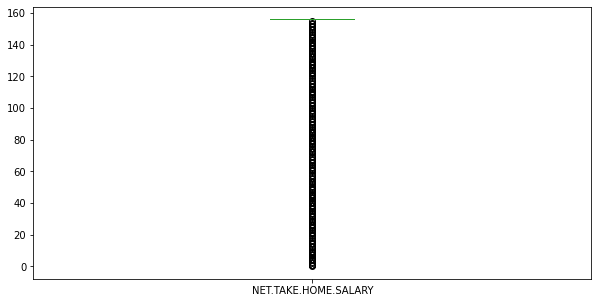

In [66]:
df1["NET.TAKE.HOME.SALARY"].plot.box(figsize=(10,5))

In [93]:
df1.drop("NET.TAKE.HOME.SALARY",axis=1,inplace=True)

<AxesSubplot:xlabel='APPLIED.AMOUNT'>

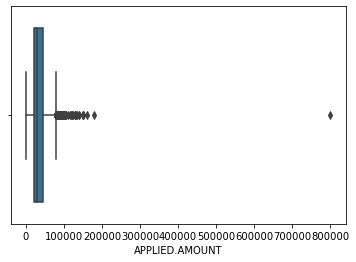

In [67]:
sns.boxplot(df1["APPLIED.AMOUNT"])

In [68]:
# Z-Score Method
mean=df1["APPLIED.AMOUNT"].mean()
std=df1["APPLIED.AMOUNT"].std()

threshold=3
outliers=[]

for x in df1["APPLIED.AMOUNT"]:
    z_score=(x-mean)/std
    #print(x,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x)
print(f"Detected Outliers are: {outliers}")
print()
print(f"Total Number of outliers :{len(outliers)}")

Detected Outliers are: [100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 110000, 100000, 100000, 100000, 160000, 100000, 100000, 150000, 99000, 100000, 100000, 800000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 135290, 100000, 100000, 115000, 100000, 100000, 100000, 128000, 100000, 132000, 100000, 125000, 100000, 100000, 100000, 129500, 95000, 100000, 129500, 100000, 100000, 95000, 95000, 100000, 150000, 100000, 92000, 100000, 100000, 180000, 150000, 100000, 100000, 100000, 95000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 140000, 150000, 95000, 100000, 118000, 100000, 100000, 95000, 105000, 100000, 100000, 100000, 120000, 105000, 100000, 100000, 100000, 100000, 100000, 95000, 100000, 100000, 100000, 100000, 100000, 120000, 100000, 140000]

Total Number of outliers :100


In [69]:
# IQR Method
q1=df1["APPLIED.AMOUNT"].quantile(0.25)
q3=df1["APPLIED.AMOUNT"].quantile(0.75)

iqr=q3 - q1

lower_tail= q1 - 1.5*iqr
upper_tail= q3 + 1.5*iqr

print(f"Lower Tail is :{lower_tail}")
print()
print(f"Upper Tail is :{upper_tail}")

Lower Tail is :-13305.0

Upper Tail is :78175.0


In [85]:
df1.loc[df1["APPLIED.AMOUNT"]>78175.0,"APPLIED.AMOUNT"]=df1.loc[df1["APPLIED.AMOUNT"]<78175.0,"APPLIED.AMOUNT"].median()

In [86]:
df1.loc[df1["APPLIED.AMOUNT"]<-13305.0,"APPLIED.AMOUNT"]=df1.loc[df1["APPLIED.AMOUNT"]>-13305.0,"APPLIED.AMOUNT"].median()

In [70]:
chi2_df.sort_values("Chi_square",ascending=False,ignore_index=True)

,Columns,P_value,Chi_square
0,APPROVED.AMOUNT,0.000000e+00,187226.935120
1,APPLIED.AMOUNT,0.000000e+00,94398.140758
2,CIBIL.SCORE,0.000000e+00,77689.348560
3,ASSET.CTG,0.000000e+00,16610.335194
4,ASSET.MAKE,0.000000e+00,11960.279650
5,RESIDENCE.TYPE,1.503072e-67,301.564237
6,CURRENT.STAGE,4.028229e-50,221.610427
7,OWN.HOUSE.TYPE,4.493935e-33,143.533309
8,PRIMARY.ASSET.MAKE,9.739636e-11,41.873039
9,HOUSE.SURROGATE.DOCUMENT.TYPE,2.372627e-06,22.266889


<AxesSubplot:xlabel='RESIDENCE.TYPE'>

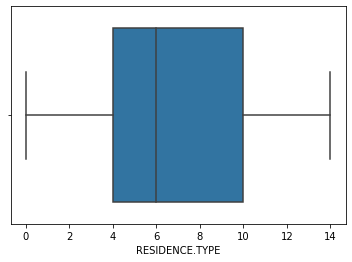

In [71]:
sns.boxplot(df1["RESIDENCE.TYPE"])

<AxesSubplot:xlabel='AGE'>

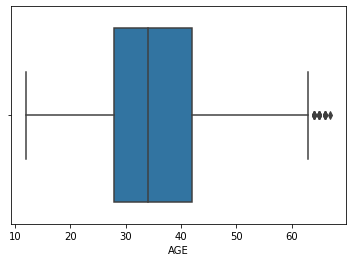

In [72]:
sns.boxplot(df1["AGE"])

In [73]:
# Z-Score Method
mean=df1["AGE"].mean()
std=df1["AGE"].std()

threshold=3
outliers=[]

for x in df1["AGE"]:
    z_score=(x-mean)/std
    #print(x,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x)
print(f"Detected Outliers are: {outliers}")
print()
print(f"Total Number of outliers :{len(outliers)}")

Detected Outliers are: [66, 66, 66, 65, 65, 64, 65, 65, 65, 65, 66, 65, 66, 67, 64, 66, 65, 66, 65, 64, 64, 64, 66, 64, 64, 64]

Total Number of outliers :26


In [74]:
# IQR Method
q1=df1["AGE"].quantile(0.25)
q3=df1["AGE"].quantile(0.75)

iqr=q3 - q1

lower_tail= q1 - 1.5*iqr
upper_tail= q3 + 1.5*iqr

print(f"Lower Tail is :{lower_tail}")
print()
print(f"Upper Tail is :{upper_tail}")

Lower Tail is :7.0

Upper Tail is :63.0


In [87]:
df1.loc[df1["AGE"]>63,"AGE"]=df1.loc[df1["AGE"]<63,"AGE"].median()

In [89]:
df1.loc[df1["AGE"]<7,"AGE"]=df1.loc[df1["AGE"]>7,"AGE"].median()

<AxesSubplot:xlabel='LOAN.TENOR'>

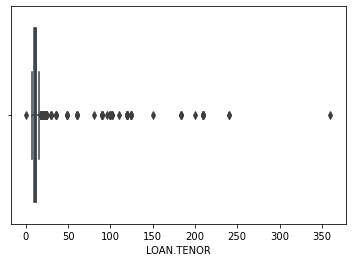

In [75]:
sns.boxplot(df1["LOAN.TENOR"])

In [76]:
# Z-Score Method
mean=df1["LOAN.TENOR"].mean()
std=df1["LOAN.TENOR"].std()

threshold=3
outliers=[]

for x in df1["LOAN.TENOR"]:
    z_score=(x-mean)/std
    #print(x,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x)
print(f"Detected Outliers are: {outliers}")
print()
print(f"Total Number of outliers :{len(outliers)}")

Detected Outliers are: [120, 96, 240, 100, 124, 100, 90, 90, 90, 120, 120, 100, 102, 90, 120, 60, 184, 184, 102, 240, 124, 60, 100, 210, 120, 210, 90, 90, 102, 110, 100, 90, 124, 124, 60, 210, 100, 124, 124, 102, 90, 210, 80, 210, 124, 120, 184, 210, 90, 60, 200, 100, 120, 360, 210, 60, 210, 120, 184, 60, 60, 150, 90, 120, 124, 120, 120, 120, 102, 100, 210]

Total Number of outliers :71


In [77]:
# IQR Method
q1=df1["LOAN.TENOR"].quantile(0.25)
q3=df1["LOAN.TENOR"].quantile(0.75)

iqr=q3 - q1

lower_tail= q1 - 1.5*iqr
upper_tail= q3 + 1.5*iqr

print(f"Lower Tail is :{lower_tail}")
print()
print(f"Upper Tail is :{upper_tail}")

Lower Tail is :7.0

Upper Tail is :15.0


<AxesSubplot:xlabel='PAN'>

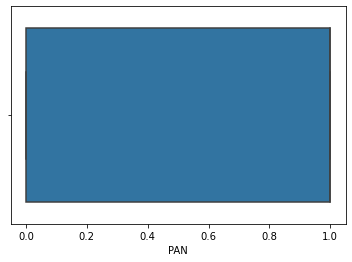

In [78]:
sns.boxplot(df1["PAN"])

In [79]:
df1.columns

Index(['APPLICATION.STATUS', 'CURRENT.STAGE', 'MARITAL.STATUS', 'AGE',
       'RESIDENCE.TYPE', 'NET.TAKE.HOME.SALARY', 'CIBIL.SCORE',
       'APPROVED.AMOUNT', 'ASSET.MAKE', 'ASSET.CTG', 'APPLIED.AMOUNT',
       'LOAN.TENOR', 'OWN.HOUSE.TYPE', 'HOUSE.SURROGATE.DOCUMENT.TYPE',
       'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE', 'AADHAAR', 'PAN',
       'BANK_PASSBOOK', 'GRADUATE', 'OTHERS', 'POST-GRADUATE',
       'UNDER GRADUATE', 'NOT_FOUND', 'Pan Not Submitted'],
      dtype='object')

<AxesSubplot:xlabel='ASSET.MAKE'>

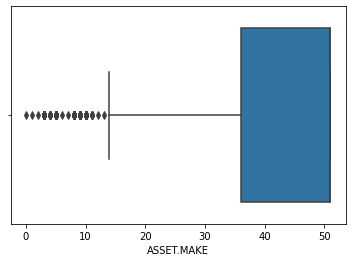

In [80]:
sns.boxplot(df1["ASSET.MAKE"])

In [81]:
# Z-Score Method
mean=df1["ASSET.MAKE"].mean()
std=df1["ASSET.MAKE"].std()

threshold=3
outliers=[]

for x in df1["ASSET.MAKE"]:
    z_score=(x-mean)/std
    #print(x,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x)
print(f"Detected Outliers are: {outliers}")
print()
print(f"Total Number of outliers :{len(outliers)}")

Detected Outliers are: [1, 0]

Total Number of outliers :2


In [82]:
# IQR Method
q1=df1["ASSET.MAKE"].quantile(0.25)
q3=df1["ASSET.MAKE"].quantile(0.75)

iqr=q3 - q1

lower_tail= q1 - 1.5*iqr
upper_tail= q3 + 1.5*iqr

print(f"Lower Tail is :{lower_tail}")
print()
print(f"Upper Tail is :{upper_tail}")

Lower Tail is :13.5

Upper Tail is :73.5


In [90]:
df1.loc[df1["ASSET.MAKE"]>73.5,"ASSET.MAKE"]=df1.loc[df1["ASSET.MAKE"]<73.5,"ASSET.MAKE"].median()

In [91]:
df1.loc[df1["ASSET.MAKE"]<13.5,"ASSET.MAKE"]=df1.loc[df1["ASSET.MAKE"]>13.5,"ASSET.MAKE"].median()

<AxesSubplot:xlabel='OWN.HOUSE.TYPE'>

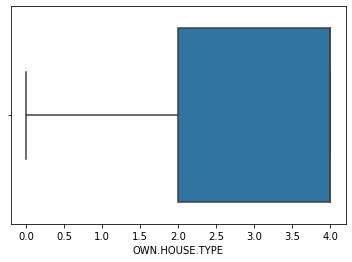

In [83]:
sns.boxplot(df1["OWN.HOUSE.TYPE"])

<AxesSubplot:xlabel='ASSET.CTG'>

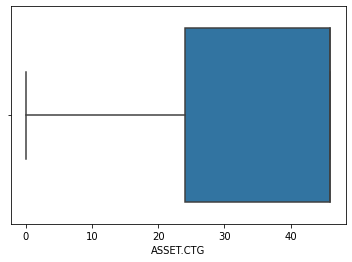

In [84]:
sns.boxplot(df1["ASSET.CTG"])

# Spliting

In [94]:
x=df1.drop("APPLICATION.STATUS",axis=1)
y=df1["APPLICATION.STATUS"]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# Model Training

In [96]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

## Testing Data Accuracy

In [97]:
y_test_pred=log_model.predict(x_test)

training_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Training Accuracy:\n{training_accuracy}")
print()
class_report=classification_report(y_test,y_test_pred)
print(f"Classification Report: \n{class_report}")
print()
conf_matrix=confusion_matrix(y_test,y_test_pred)
print(f"Confussion Matrix: \n{conf_matrix}")

Training Accuracy:
0.8002577319587629

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       664
           1       0.90      0.73      0.81       888

    accuracy                           0.80      1552
   macro avg       0.81      0.81      0.80      1552
weighted avg       0.82      0.80      0.80      1552


Confussion Matrix: 
[[593  71]
 [239 649]]


## Training Data Accuracy

In [98]:
y_train_pred=log_model.predict(x_train)

training_accuracy=accuracy_score(y_train,y_train_pred)
print(f"Training Accuracy:\n{training_accuracy}")
print()
class_report=classification_report(y_train,y_train_pred)
print(f"Classification Report: \n{class_report}")
print()
conf_matrix=confusion_matrix(y_train,y_train_pred)
print(f"Confussion Matrix: \n{conf_matrix}")

Training Accuracy:
0.8058643467053327

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.88      0.80      2658
           1       0.89      0.75      0.82      3549

    accuracy                           0.81      6207
   macro avg       0.81      0.82      0.81      6207
weighted avg       0.82      0.81      0.81      6207


Confussion Matrix: 
[[2345  313]
 [ 892 2657]]


In [100]:
y_pred_proba=log_model.predict_proba(x_test)
y_pred_proba[:,1]

array([0.14842064, 0.91805273, 0.67233555, ..., 0.51131735, 0.91081635,
       0.13890224])

## FPR,TPR,THRESHOLD

In [101]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba[:,1])

In [103]:
print(fpr,len(fpr))

[0.         0.         0.         0.00150602 0.00150602 0.00301205
 0.00301205 0.0060241  0.0060241  0.00753012 0.00753012 0.01204819
 0.01204819 0.01355422 0.01355422 0.01506024 0.01506024 0.01807229
 0.01807229 0.01957831 0.01957831 0.02108434 0.02108434 0.02259036
 0.02259036 0.02409639 0.02409639 0.02861446 0.02861446 0.03012048
 0.03012048 0.03162651 0.03162651 0.03313253 0.03313253 0.03463855
 0.03463855 0.03614458 0.03614458 0.0376506  0.0376506  0.03915663
 0.03915663 0.04066265 0.04066265 0.04216867 0.04216867 0.04518072
 0.04518072 0.04668675 0.04668675 0.04819277 0.04819277 0.05271084
 0.05271084 0.05421687 0.05421687 0.06475904 0.06475904 0.07078313
 0.07078313 0.07228916 0.07228916 0.07379518 0.07379518 0.0753012
 0.0753012  0.07831325 0.07831325 0.0813253  0.0813253  0.08584337
 0.08584337 0.09186747 0.09186747 0.09789157 0.09789157 0.10090361
 0.10090361 0.10692771 0.10692771 0.10843373 0.10843373 0.11144578
 0.11144578 0.11295181 0.11295181 0.11445783 0.11445783 0.12650

In [104]:
print(tpr,len(tpr))

[0.         0.00112613 0.60022523 0.60022523 0.60585586 0.60585586
 0.61373874 0.61373874 0.61824324 0.61824324 0.62612613 0.62612613
 0.6295045  0.6295045  0.63626126 0.63626126 0.64076577 0.64076577
 0.64752252 0.64752252 0.65540541 0.65540541 0.65990991 0.65990991
 0.66554054 0.66554054 0.66666667 0.66666667 0.6722973  0.6722973
 0.67342342 0.67342342 0.67792793 0.67792793 0.68018018 0.68018018
 0.68243243 0.68243243 0.68468468 0.68468468 0.68581081 0.68581081
 0.68693694 0.68693694 0.69369369 0.69369369 0.70157658 0.70157658
 0.7027027  0.7027027  0.70495495 0.70495495 0.70720721 0.70720721
 0.70833333 0.70833333 0.71058559 0.71058559 0.71171171 0.71171171
 0.71283784 0.71283784 0.71621622 0.71621622 0.71734234 0.71734234
 0.71846847 0.71846847 0.72072072 0.72072072 0.72184685 0.72184685
 0.7240991  0.7240991  0.72522523 0.72522523 0.7286036  0.7286036
 0.73085586 0.73085586 0.73198198 0.73198198 0.73310811 0.73310811
 0.73423423 0.73423423 0.73761261 0.73761261 0.74099099 0.740990

In [105]:
print(threshold,len(threshold))

[1.99999765 0.99999765 0.73380433 0.7336019  0.72896627 0.72775597
 0.72322829 0.71503455 0.70989839 0.70798695 0.69990645 0.69636981
 0.69339448 0.69201005 0.67807021 0.67806582 0.67601287 0.67233555
 0.66618972 0.66482575 0.65665871 0.65608764 0.65206761 0.65126121
 0.64734519 0.64718918 0.6391734  0.63479995 0.63289468 0.63237025
 0.63060992 0.63057008 0.62590091 0.62556437 0.62014615 0.61788454
 0.61510478 0.61367463 0.61141633 0.61063324 0.60925311 0.60899714
 0.60771618 0.60660549 0.60286832 0.60000459 0.59138921 0.59009378
 0.58886258 0.588359   0.58464553 0.58408954 0.58281561 0.57928332
 0.57409074 0.56597574 0.56217281 0.55470427 0.55343145 0.54923671
 0.54911963 0.5480371  0.54486037 0.544035   0.54380465 0.54325609
 0.54173989 0.53843475 0.53102596 0.52886026 0.52658447 0.52499786
 0.52051814 0.51284837 0.51278648 0.51107354 0.51033618 0.5094355
 0.5058188  0.50199508 0.4999468  0.49829988 0.49765941 0.49570618
 0.49451703 0.49352362 0.49093405 0.49039267 0.4884944  0.48149

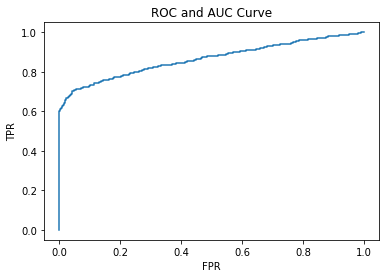

In [106]:
plt.title("ROC and AUC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)

## ROC and AUC Score

In [107]:
rocauc_score=roc_auc_score(y_test,y_pred_proba[:,1])
print(f"ROC and AUC Score:{rocauc_score}")

ROC and AUC Score:0.8647308829914252
